# UCI Opportunity dataset (Human Activity Recognition)

In [1]:
import numpy as np
import pandas as pd
import os
from typing import List
from pathlib import Path
from config import data_raw_folder, data_processed_folder
from timeeval import Datasets
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
dataset_collection_name = "OPPORTUNITY"
source_folder = Path(data_raw_folder) / "UCI ML Repository/OPPORTUNITY/dataset"
target_folder = Path(data_processed_folder)

print(f"Looking for source datasets in {source_folder.absolute()} and\nsaving processed datasets in {target_folder.absolute()}")

Looking for source datasets in /home/projects/akita/data/benchmark-data/data-raw/UCI ML Repository/OPPORTUNITY/dataset and
saving processed datasets in /home/projects/akita/data/benchmark-data/data-processed


In [47]:
columns = [
    "timestamp", "Accelerometer RKN^ accX", "Accelerometer RKN^ accY", "Accelerometer RKN^ accZ", "Accelerometer HIP accX", "Accelerometer HIP accY", "Accelerometer HIP accZ", "Accelerometer LUA^ accX", "Accelerometer LUA^ accY", "Accelerometer LUA^ accZ", "Accelerometer RUA_ accX", "Accelerometer RUA_ accY", "Accelerometer RUA_ accZ", "Accelerometer LH accX", "Accelerometer LH accY", "Accelerometer LH accZ", "Accelerometer BACK accX", "Accelerometer BACK accY", "Accelerometer BACK accZ", "Accelerometer RKN_ accX", "Accelerometer RKN_ accY", "Accelerometer RKN_ accZ", "Accelerometer RWR accX", "Accelerometer RWR accY", "Accelerometer RWR accZ", "Accelerometer RUA^ accX", "Accelerometer RUA^ accY", "Accelerometer RUA^ accZ", "Accelerometer LUA_ accX", "Accelerometer LUA_ accY", "Accelerometer LUA_ accZ", "Accelerometer LWR accX", "Accelerometer LWR accY", "Accelerometer LWR accZ", "Accelerometer RH accX", "Accelerometer RH accY", "Accelerometer RH accZ", "InertialMeasurementUnit BACK accX", "InertialMeasurementUnit BACK accY", "InertialMeasurementUnit BACK accZ", "InertialMeasurementUnit BACK gyroX", "InertialMeasurementUnit BACK gyroY", "InertialMeasurementUnit BACK gyroZ", "InertialMeasurementUnit BACK magneticX", "InertialMeasurementUnit BACK magneticY", "InertialMeasurementUnit BACK magneticZ", "InertialMeasurementUnit BACK Quaternion1", "InertialMeasurementUnit BACK Quaternion2", "InertialMeasurementUnit BACK Quaternion3", "InertialMeasurementUnit BACK Quaternion4", "InertialMeasurementUnit RUA accX", "InertialMeasurementUnit RUA accY", "InertialMeasurementUnit RUA accZ", "InertialMeasurementUnit RUA gyroX", "InertialMeasurementUnit RUA gyroY", "InertialMeasurementUnit RUA gyroZ", "InertialMeasurementUnit RUA magneticX", "InertialMeasurementUnit RUA magneticY", "InertialMeasurementUnit RUA magneticZ", "InertialMeasurementUnit RUA Quaternion1", "InertialMeasurementUnit RUA Quaternion2", "InertialMeasurementUnit RUA Quaternion3", "InertialMeasurementUnit RUA Quaternion4", "InertialMeasurementUnit RLA accX", "InertialMeasurementUnit RLA accY", "InertialMeasurementUnit RLA accZ", "InertialMeasurementUnit RLA gyroX", "InertialMeasurementUnit RLA gyroY", "InertialMeasurementUnit RLA gyroZ", "InertialMeasurementUnit RLA magneticX", "InertialMeasurementUnit RLA magneticY", "InertialMeasurementUnit RLA magneticZ", "InertialMeasurementUnit RLA Quaternion1", "InertialMeasurementUnit RLA Quaternion2", "InertialMeasurementUnit RLA Quaternion3", "InertialMeasurementUnit RLA Quaternion4", "InertialMeasurementUnit LUA accX", "InertialMeasurementUnit LUA accY", "InertialMeasurementUnit LUA accZ", "InertialMeasurementUnit LUA gyroX", "InertialMeasurementUnit LUA gyroY", "InertialMeasurementUnit LUA gyroZ", "InertialMeasurementUnit LUA magneticX", "InertialMeasurementUnit LUA magneticY", "InertialMeasurementUnit LUA magneticZ", "InertialMeasurementUnit LUA Quaternion1", "InertialMeasurementUnit LUA Quaternion2", "InertialMeasurementUnit LUA Quaternion3", "InertialMeasurementUnit LUA Quaternion4", "InertialMeasurementUnit LLA accX", "InertialMeasurementUnit LLA accY", "InertialMeasurementUnit LLA accZ", "InertialMeasurementUnit LLA gyroX", "InertialMeasurementUnit LLA gyroY", "InertialMeasurementUnit LLA gyroZ", "InertialMeasurementUnit LLA magneticX", "InertialMeasurementUnit LLA magneticY", "InertialMeasurementUnit LLA magneticZ", "InertialMeasurementUnit LLA Quaternion1", "InertialMeasurementUnit LLA Quaternion2", "InertialMeasurementUnit LLA Quaternion3", "InertialMeasurementUnit LLA Quaternion4", "InertialMeasurementUnit L-SHOE EuX", "InertialMeasurementUnit L-SHOE EuY", "InertialMeasurementUnit L-SHOE EuZ", "InertialMeasurementUnit L-SHOE Nav_Ax", "InertialMeasurementUnit L-SHOE Nav_Ay", "InertialMeasurementUnit L-SHOE Nav_Az", "InertialMeasurementUnit L-SHOE Body_Ax", "InertialMeasurementUnit L-SHOE Body_Ay", "InertialMeasurementUnit L-SHOE Body_Az", "InertialMeasurementUnit L-SHOE AngVelBodyFrameX", "InertialMeasurementUnit L-SHOE AngVelBodyFrameY", "InertialMeasurementUnit L-SHOE AngVelBodyFrameZ", "InertialMeasurementUnit L-SHOE AngVelNavFrameX", "InertialMeasurementUnit L-SHOE AngVelNavFrameY", "InertialMeasurementUnit L-SHOE AngVelNavFrameZ", "InertialMeasurementUnit L-SHOE Compass", "InertialMeasurementUnit R-SHOE EuX", "InertialMeasurementUnit R-SHOE EuY", "InertialMeasurementUnit R-SHOE EuZ", "InertialMeasurementUnit R-SHOE Nav_Ax", "InertialMeasurementUnit R-SHOE Nav_Ay", "InertialMeasurementUnit R-SHOE Nav_Az", "InertialMeasurementUnit R-SHOE Body_Ax", "InertialMeasurementUnit R-SHOE Body_Ay", "InertialMeasurementUnit R-SHOE Body_Az", "InertialMeasurementUnit R-SHOE AngVelBodyFrameX", "InertialMeasurementUnit R-SHOE AngVelBodyFrameY", "InertialMeasurementUnit R-SHOE AngVelBodyFrameZ", "InertialMeasurementUnit R-SHOE AngVelNavFrameX", "InertialMeasurementUnit R-SHOE AngVelNavFrameY", "InertialMeasurementUnit R-SHOE AngVelNavFrameZ", "InertialMeasurementUnit R-SHOE Compass", "Accelerometer CUP accX", "Accelerometer CUP accY", "Accelerometer CUP accZ", "Accelerometer CUP gyroX", "Accelerometer CUP gyroY", "Accelerometer SALAMI accX", "Accelerometer SALAMI accY", "Accelerometer SALAMI accZ", "Accelerometer SALAMI gyroX", "Accelerometer SALAMI gyroY", "Accelerometer WATER accX", "Accelerometer WATER accY", "Accelerometer WATER accZ", "Accelerometer WATER gyroX", "Accelerometer WATER gyroY", "Accelerometer CHEESE accX", "Accelerometer CHEESE accY", "Accelerometer CHEESE accZ", "Accelerometer CHEESE gyroX", "Accelerometer CHEESE gyroY", "Accelerometer BREAD accX", "Accelerometer BREAD accY", "Accelerometer BREAD accZ", "Accelerometer BREAD gyroX", "Accelerometer BREAD gyroY", "Accelerometer KNIFE1 accX", "Accelerometer KNIFE1 accY", "Accelerometer KNIFE1 accZ", "Accelerometer KNIFE1 gyroX", "Accelerometer KNIFE1 gyroY", "Accelerometer MILK accX", "Accelerometer MILK accY", "Accelerometer MILK accZ", "Accelerometer MILK gyroX", "Accelerometer MILK gyroY", "Accelerometer SPOON accX", "Accelerometer SPOON accY", "Accelerometer SPOON accZ", "Accelerometer SPOON gyroX", "Accelerometer SPOON gyroY", "Accelerometer SUGAR accX", "Accelerometer SUGAR accY", "Accelerometer SUGAR accZ", "Accelerometer SUGAR gyroX", "Accelerometer SUGAR gyroY", "Accelerometer KNIFE2 accX", "Accelerometer KNIFE2 accY", "Accelerometer KNIFE2 accZ", "Accelerometer KNIFE2 gyroX", "Accelerometer KNIFE2 gyroY", "Accelerometer PLATE accX", "Accelerometer PLATE accY", "Accelerometer PLATE accZ", "Accelerometer PLATE gyroX", "Accelerometer PLATE gyroY", "Accelerometer GLASS accX", "Accelerometer GLASS accY", "Accelerometer GLASS accZ", "Accelerometer GLASS gyroX", "Accelerometer GLASS gyroY", "REED SWITCH DISHWASHER S1", "REED SWITCH FRIDGE S3", "REED SWITCH FRIDGE S2", "REED SWITCH FRIDGE S1", "REED SWITCH MIDDLEDRAWER S1", "REED SWITCH MIDDLEDRAWER S2", "REED SWITCH MIDDLEDRAWER S3", "REED SWITCH LOWERDRAWER S3", "REED SWITCH LOWERDRAWER S2", "REED SWITCH UPPERDRAWER", "REED SWITCH DISHWASHER S3", "REED SWITCH LOWERDRAWER S1", "REED SWITCH DISHWASHER S2", "Accelerometer DOOR1 accX", "Accelerometer DOOR1 accY", "Accelerometer DOOR1 accZ", "Accelerometer LAZYCHAIR accX", "Accelerometer LAZYCHAIR accY", "Accelerometer LAZYCHAIR accZ", "Accelerometer DOOR2 accX", "Accelerometer DOOR2 accY", "Accelerometer DOOR2 accZ", "Accelerometer DISHWASHER accX", "Accelerometer DISHWASHER accY", "Accelerometer DISHWASHER accZ", "Accelerometer UPPERDRAWER accX", "Accelerometer UPPERDRAWER accY", "Accelerometer UPPERDRAWER accZ", "Accelerometer LOWERDRAWER accX", "Accelerometer LOWERDRAWER accY", "Accelerometer LOWERDRAWER accZ", "Accelerometer MIDDLEDRAWER accX", "Accelerometer MIDDLEDRAWER accY", "Accelerometer MIDDLEDRAWER accZ", "Accelerometer FRIDGE accX", "Accelerometer FRIDGE accY", "Accelerometer FRIDGE accZ", "LOCATION TAG1 X", "LOCATION TAG1 Y", "LOCATION TAG1 Z", "LOCATION TAG2 X", "LOCATION TAG2 Y", "LOCATION TAG2 Z", "LOCATION TAG3 X", "LOCATION TAG3 Y", "LOCATION TAG3 Z", "LOCATION TAG4 X", "LOCATION TAG4 Y", "LOCATION TAG4 Z", "Locomotion", "HL_Activity", "LL_Left_Arm", "LL_Left_Arm_Object", "LL_Right_Arm", "LL_Right_Arm_Object", "ML_Both_Arms"
]
ignore_columns = [
    "Accelerometer CUP accX", "Accelerometer CUP accY", "Accelerometer CUP accZ", "Accelerometer CUP gyroX", "Accelerometer CUP gyroY", "Accelerometer SALAMI accX", "Accelerometer SALAMI accY", "Accelerometer SALAMI accZ", "Accelerometer SALAMI gyroX", "Accelerometer SALAMI gyroY", "Accelerometer WATER accX", "Accelerometer WATER accY", "Accelerometer WATER accZ", "Accelerometer WATER gyroX", "Accelerometer WATER gyroY", "Accelerometer CHEESE accX", "Accelerometer CHEESE accY", "Accelerometer CHEESE accZ", "Accelerometer CHEESE gyroX", "Accelerometer CHEESE gyroY", "Accelerometer BREAD accX", "Accelerometer BREAD accY", "Accelerometer BREAD accZ", "Accelerometer BREAD gyroX", "Accelerometer BREAD gyroY", "Accelerometer KNIFE1 accX", "Accelerometer KNIFE1 accY", "Accelerometer KNIFE1 accZ", "Accelerometer KNIFE1 gyroX", "Accelerometer KNIFE1 gyroY", "Accelerometer MILK accX", "Accelerometer MILK accY", "Accelerometer MILK accZ", "Accelerometer MILK gyroX", "Accelerometer MILK gyroY", "Accelerometer SPOON accX", "Accelerometer SPOON accY", "Accelerometer SPOON accZ", "Accelerometer SPOON gyroX", "Accelerometer SPOON gyroY", "Accelerometer SUGAR accX", "Accelerometer SUGAR accY", "Accelerometer SUGAR accZ", "Accelerometer SUGAR gyroX", "Accelerometer SUGAR gyroY", "Accelerometer KNIFE2 accX", "Accelerometer KNIFE2 accY", "Accelerometer KNIFE2 accZ", "Accelerometer KNIFE2 gyroX", "Accelerometer KNIFE2 gyroY", "Accelerometer PLATE accX", "Accelerometer PLATE accY", "Accelerometer PLATE accZ", "Accelerometer PLATE gyroX", "Accelerometer PLATE gyroY", "Accelerometer GLASS accX", "Accelerometer GLASS accY", "Accelerometer GLASS accZ", "Accelerometer GLASS gyroX", "Accelerometer GLASS gyroY", "REED SWITCH DISHWASHER S1", "REED SWITCH FRIDGE S3", "REED SWITCH FRIDGE S2", "REED SWITCH FRIDGE S1", "REED SWITCH MIDDLEDRAWER S1", "REED SWITCH MIDDLEDRAWER S2", "REED SWITCH MIDDLEDRAWER S3", "REED SWITCH LOWERDRAWER S3", "REED SWITCH LOWERDRAWER S2", "REED SWITCH UPPERDRAWER", "REED SWITCH DISHWASHER S3", "REED SWITCH LOWERDRAWER S1", "REED SWITCH DISHWASHER S2", "Accelerometer DOOR1 accX", "Accelerometer DOOR1 accY", "Accelerometer DOOR1 accZ", "Accelerometer LAZYCHAIR accX", "Accelerometer LAZYCHAIR accY", "Accelerometer LAZYCHAIR accZ", "Accelerometer DOOR2 accX", "Accelerometer DOOR2 accY", "Accelerometer DOOR2 accZ", "Accelerometer DISHWASHER accX", "Accelerometer DISHWASHER accY", "Accelerometer DISHWASHER accZ", "Accelerometer UPPERDRAWER accX", "Accelerometer UPPERDRAWER accY", "Accelerometer UPPERDRAWER accZ", "Accelerometer LOWERDRAWER accX", "Accelerometer LOWERDRAWER accY", "Accelerometer LOWERDRAWER accZ", "Accelerometer MIDDLEDRAWER accX", "Accelerometer MIDDLEDRAWER accY", "Accelerometer MIDDLEDRAWER accZ", "Accelerometer FRIDGE accX", "Accelerometer FRIDGE accY", "Accelerometer FRIDGE accZ", "LOCATION TAG1 X", "LOCATION TAG1 Y", "LOCATION TAG1 Z", "LOCATION TAG2 X", "LOCATION TAG2 Y", "LOCATION TAG2 Z", "LOCATION TAG3 X", "LOCATION TAG3 Y", "LOCATION TAG3 Z", "LOCATION TAG4 X", "LOCATION TAG4 Y", "LOCATION TAG4 Z",
    "HL_Activity", "LL_Left_Arm", "LL_Left_Arm_Object", "LL_Right_Arm", "LL_Right_Arm_Object", "ML_Both_Arms"
]
use_columns = list(set(columns) - set(ignore_columns))

In [49]:
train_type = "unsupervised"
train_is_normal = False
input_type = "multivariate"
datetime_index = True
dataset_type = "real"

# create target directory
dataset_subfolder = os.path.join(input_type, dataset_collection_name)
target_subfolder = os.path.join(target_folder, dataset_subfolder)
try:
    os.makedirs(target_subfolder)
    print(f"Created directories {target_subfolder}")
except FileExistsError:
    print(f"Directories {target_subfolder} already exist")
    pass

dm = Datasets(target_folder)
experiments = [f for f in source_folder.glob("*.dat")]
experiments

Directories /home/projects/akita/data/benchmark-data/data-processed/multivariate/OPPORTUNITY already exist


[PosixPath('/home/projects/akita/data/benchmark-data/data-raw/UCI ML Repository/OPPORTUNITY/dataset/S1-ADL5.dat'),
 PosixPath('/home/projects/akita/data/benchmark-data/data-raw/UCI ML Repository/OPPORTUNITY/dataset/S2-ADL3.dat'),
 PosixPath('/home/projects/akita/data/benchmark-data/data-raw/UCI ML Repository/OPPORTUNITY/dataset/S3-ADL2.dat'),
 PosixPath('/home/projects/akita/data/benchmark-data/data-raw/UCI ML Repository/OPPORTUNITY/dataset/S4-ADL2.dat'),
 PosixPath('/home/projects/akita/data/benchmark-data/data-raw/UCI ML Repository/OPPORTUNITY/dataset/S2-ADL4.dat'),
 PosixPath('/home/projects/akita/data/benchmark-data/data-raw/UCI ML Repository/OPPORTUNITY/dataset/S3-ADL4.dat'),
 PosixPath('/home/projects/akita/data/benchmark-data/data-raw/UCI ML Repository/OPPORTUNITY/dataset/S1-Drill.dat'),
 PosixPath('/home/projects/akita/data/benchmark-data/data-raw/UCI ML Repository/OPPORTUNITY/dataset/S4-ADL3.dat'),
 PosixPath('/home/projects/akita/data/benchmark-data/data-raw/UCI ML Repository

In [50]:
def transform_experiment_file(path: Path) -> List[pd.DataFrame]:
    df = pd.read_csv(path, sep=' ', header=None, names=columns, usecols=use_columns)
    df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")
    df["is_anomaly"] = 0
    df.loc[df["Locomotion"] == 5, "is_anomaly"] = 1
    del df["Locomotion"]
    return df

In [51]:
for exp in experiments:
    # transform file to get datasets
    df = transform_experiment_file(exp)
    # get target filenames
    experiment_name = os.path.splitext(exp.name)[0]
    dataset_name = f"{experiment_name}"
    filename = f"{dataset_name}.test.csv"
    path = os.path.join(dataset_subfolder, filename)
    target_filepath = os.path.join(target_subfolder, filename)

    # calc length and save in file
    dataset_length = len(df)
    df.to_csv(target_filepath, index=False)
    print(f"Processed source dataset {exp} -> {target_filepath}")

    # save metadata
    dm.add_dataset((dataset_collection_name, dataset_name),
        train_path = None,
        test_path = path,
        dataset_type = dataset_type,
        datetime_index = datetime_index,
        split_at = None,
        train_type = train_type,
        train_is_normal = train_is_normal,
        input_type = input_type,
        dataset_length = dataset_length
    )

dm.save()

Processed source dataset /home/projects/akita/data/benchmark-data/data-raw/UCI ML Repository/OPPORTUNITY/dataset/S1-ADL5.dat -> /home/projects/akita/data/benchmark-data/data-processed/multivariate/OPPORTUNITY/S1-ADL5.test.csv
Processed source dataset /home/projects/akita/data/benchmark-data/data-raw/UCI ML Repository/OPPORTUNITY/dataset/S2-ADL3.dat -> /home/projects/akita/data/benchmark-data/data-processed/multivariate/OPPORTUNITY/S2-ADL3.test.csv
Processed source dataset /home/projects/akita/data/benchmark-data/data-raw/UCI ML Repository/OPPORTUNITY/dataset/S3-ADL2.dat -> /home/projects/akita/data/benchmark-data/data-processed/multivariate/OPPORTUNITY/S3-ADL2.test.csv
Processed source dataset /home/projects/akita/data/benchmark-data/data-raw/UCI ML Repository/OPPORTUNITY/dataset/S4-ADL2.dat -> /home/projects/akita/data/benchmark-data/data-processed/multivariate/OPPORTUNITY/S4-ADL2.test.csv
Processed source dataset /home/projects/akita/data/benchmark-data/data-raw/UCI ML Repository/OPP

In [52]:
dm.refresh()
dm.df().loc[(slice(dataset_collection_name, dataset_collection_name), slice(None))]

train_path  \
collection_name dataset_name              
OPPORTUNITY     S1-ADL1             NaN   
                S1-ADL2             NaN   
                S1-ADL3             NaN   
                S1-ADL4             NaN   
                S1-ADL5             NaN   
                S1-Drill            NaN   
                S2-ADL1             NaN   
                S2-ADL2             NaN   
                S2-ADL3             NaN   
                S2-ADL4             NaN   
                S2-ADL5             NaN   
                S2-Drill            NaN   
                S3-ADL1             NaN   
                S3-ADL2             NaN   
                S3-ADL3             NaN   
                S3-ADL4             NaN   
                S3-ADL5             NaN   
                S3-Drill            NaN   
                S4-ADL1             NaN   
                S4-ADL2             NaN   
                S4-ADL3             NaN   
                S4-ADL4             NaN   
                S4-ADL5             NaN   
                S4-Drill            NaN   

                                                               test_path  \
collection_name dataset_name                                               
OPPORTUNITY     S1-ADL1        multivariate/OPPORTUNITY/S1-ADL1.test.csv   
                S1-ADL2        multivariate/OPPORTUNITY/S1-ADL2.test.csv   
                S1-ADL3        multivariate/OPPORTUNITY/S1-ADL3.test.csv   
                S1-ADL4        multivariate/OPPORTUNITY/S1-ADL4.test.csv   
                S1-ADL5        multivariate/OPPORTUNITY/S1-ADL5.test.csv   
                S1-Drill      multivariate/OPPORTUNITY/S1-Drill.test.csv   
                S2-ADL1        multivariate/OPPORTUNITY/S2-ADL1.test.csv   
                S2-ADL2        multivariate/OPPORTUNITY/S2-ADL2.test.csv   
                S2-ADL3        multivariate/OPPORTUNITY/S2-ADL3.test.csv   
                S2-ADL4        multivariate/OPPORTUNITY/S2-ADL4.test.csv   
                S2-ADL5        multivariate/OPPORTUNITY/S2-ADL5.test.csv   
                S2-Drill      multivariate/OPPORTUNITY/S2-Drill.test.csv   
                S3-ADL1        multivariate/OPPORTUNITY/S3-ADL1.test.csv   
                S3-ADL2        multivariate/OPPORTUNITY/S3-ADL2.test.csv   
                S3-ADL3        multivariate/OPPORTUNITY/S3-ADL3.test.csv   
                S3-ADL4        multivariate/OPPORTUNITY/S3-ADL4.test.csv   
                S3-ADL5        multivariate/OPPORTUNITY/S3-ADL5.test.csv   
                S3-Drill      multivariate/OPPORTUNITY/S3-Drill.test.csv   
                S4-ADL1        multivariate/OPPORTUNITY/S4-ADL1.test.csv   
                S4-ADL2        multivariate/OPPORTUNITY/S4-ADL2.test.csv   
                S4-ADL3        multivariate/OPPORTUNITY/S4-ADL3.test.csv   
                S4-ADL4        multivariate/OPPORTUNITY/S4-ADL4.test.csv   
                S4-ADL5        multivariate/OPPORTUNITY/S4-ADL5.test.csv   
                S4-Drill      multivariate/OPPORTUNITY/S4-Drill.test.csv   

                             dataset_type  datetime_index  split_at  \
collection_name dataset_name                                          
OPPORTUNITY     S1-ADL1              real            True       NaN   
                S1-ADL2              real            True       NaN   
                S1-ADL3              real            True       NaN   
                S1-ADL4              real            True       NaN   
                S1-ADL5              real            True       NaN   
                S1-Drill             real            True       NaN   
                S2-ADL1              real            True       NaN   
                S2-ADL2              real            True       NaN   
                S2-ADL3              real            True       NaN   
                S2-ADL4              real            True       NaN   
                S2-ADL5              real            True       NaN   
          

## Experimentation

Annotations

In [4]:
labels = pd.read_csv(source_folder / "label_legend.txt", sep="   -   ", index_col=0, engine="python")
labels

,Track name,Label name
Unique index,,
1,Locomotion,Stand
2,Locomotion,Walk
4,Locomotion,Sit
5,Locomotion,Lie
101,HL_Activity,Relaxing
...,...,...
406508,ML_Both_Arms,Open Drawer 3
404508,ML_Both_Arms,Close Drawer 3
408512,ML_Both_Arms,Clean Table


Column names (headers)

In [33]:
df = pd.read_csv(source_folder / "S1-ADL1.dat", sep=' ', header=None, names=columns, usecols=use_columns)
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="ms")
df

,timestamp,Accelerometer RKN^ accX,Accelerometer RKN^ accY,Accelerometer RKN^ accZ,Accelerometer HIP accX,Accelerometer HIP accY,Accelerometer HIP accZ,Accelerometer LUA^ accX,Accelerometer LUA^ accY,Accelerometer LUA^ accZ,...,InertialMeasurementUnit R-SHOE AngVelNavFrameY,InertialMeasurementUnit R-SHOE AngVelNavFrameZ,InertialMeasurementUnit R-SHOE Compass,Locomotion,HL_Activity,LL_Left_Arm,LL_Left_Arm_Object,LL_Right_Arm,LL_Right_Arm_Object,ML_Both_Arms
0,1970-01-01 00:00:00.000,87.0,975.0,-287.0,11.0,1001.0,163.0,95.0,975.0,152.0,...,20.0,42.0,175.0,0,0,0,0,0,0,0
1,1970-01-01 00:00:00.033,124.0,978.0,-389.0,-7.0,1014.0,199.0,124.0,968.0,123.0,...,17.0,31.0,175.0,0,0,0,0,0,0,0
2,1970-01-01 00:00:00.067,102.0,996.0,-440.0,-49.0,1024.0,193.0,127.0,1001.0,113.0,...,-27.0,15.0,175.0,0,0,0,0,0,0,0
3,1970-01-01 00:00:00.100,59.0,861.0,-384.0,-9.0,1023.0,202.0,110.0,1007.0,106.0,...,-26.0,-2.0,175.0,0,0,0,0,0,0,0
4,1970-01-01 00:00:00.133,119.0,946.0,-426.0,-22.0,1026.0,188.0,98.0,1001.0,92.0,...,-22.0,-7.0,175.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51111,1970-01-01 00:28:23.683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
51112,1970-01-01 00:28:23.716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
51113,1970-01-01 00:28:23.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
51114,1970-01-01 00:28:23.783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0


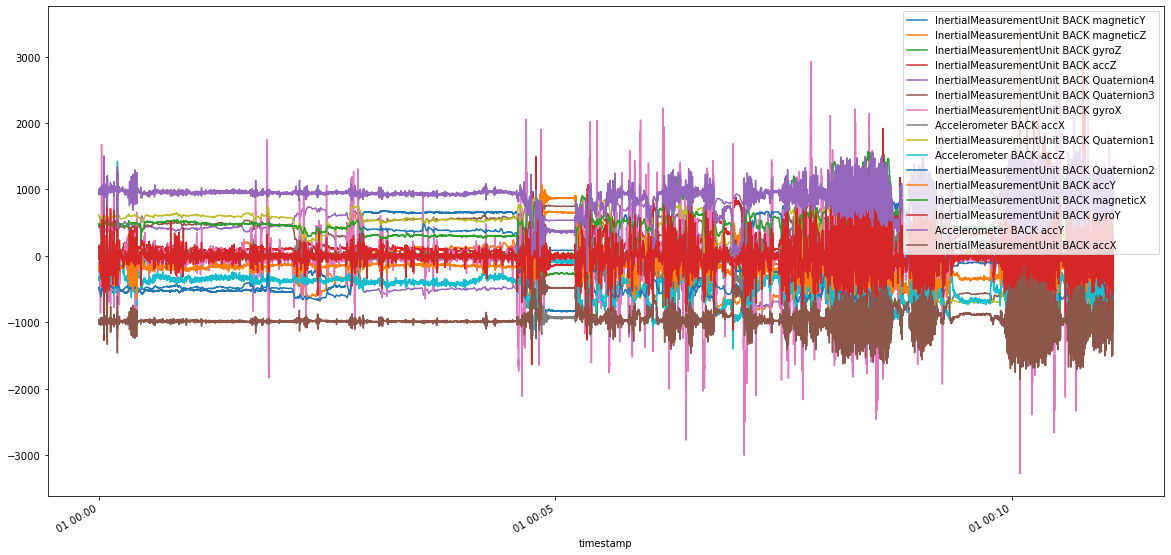

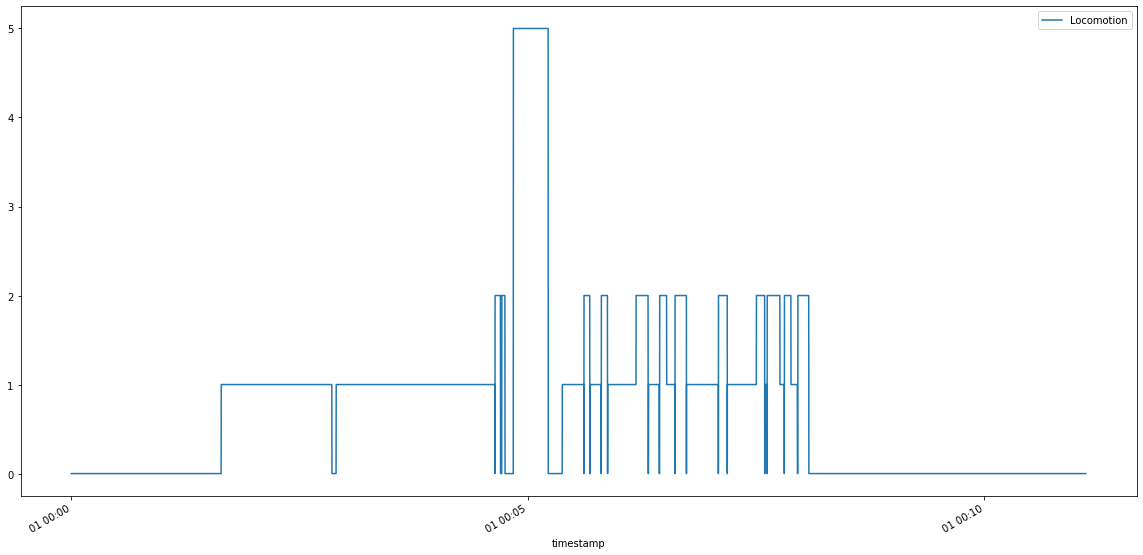

In [40]:
df.iloc[0:20000].plot(x="timestamp", y=[c for c in use_columns if "BACK" in c])
df.iloc[0:20000].plot(x="timestamp", y=["Locomotion"])
plt.show()

In [31]:
df[["Locomotion", "timestamp"]].groupby("Locomotion").count()

,timestamp
Locomotion,
0,13609
1,22380
2,6543
4,7456
5,1128


In [34]:
df[["HL_Activity", "timestamp"]].groupby("HL_Activity").count()

,timestamp
HL_Activity,
0,15586
101,1853
102,5701
103,12609
104,5132
105,10235


In [46]:
df["is_anomaly"] = 0
df.loc[df["Locomotion"] == 5, "is_anomaly"] = 1
del df["Locomotion"]
df

,timestamp,Accelerometer RKN^ accX,Accelerometer RKN^ accY,Accelerometer RKN^ accZ,Accelerometer HIP accX,Accelerometer HIP accY,Accelerometer HIP accZ,Accelerometer LUA^ accX,Accelerometer LUA^ accY,Accelerometer LUA^ accZ,...,InertialMeasurementUnit R-SHOE AngVelNavFrameY,InertialMeasurementUnit R-SHOE AngVelNavFrameZ,InertialMeasurementUnit R-SHOE Compass,HL_Activity,LL_Left_Arm,LL_Left_Arm_Object,LL_Right_Arm,LL_Right_Arm_Object,ML_Both_Arms,is_anomaly
0,1970-01-01 00:00:00.000,87.0,975.0,-287.0,11.0,1001.0,163.0,95.0,975.0,152.0,...,20.0,42.0,175.0,0,0,0,0,0,0,0
1,1970-01-01 00:00:00.033,124.0,978.0,-389.0,-7.0,1014.0,199.0,124.0,968.0,123.0,...,17.0,31.0,175.0,0,0,0,0,0,0,0
2,1970-01-01 00:00:00.067,102.0,996.0,-440.0,-49.0,1024.0,193.0,127.0,1001.0,113.0,...,-27.0,15.0,175.0,0,0,0,0,0,0,0
3,1970-01-01 00:00:00.100,59.0,861.0,-384.0,-9.0,1023.0,202.0,110.0,1007.0,106.0,...,-26.0,-2.0,175.0,0,0,0,0,0,0,0
4,1970-01-01 00:00:00.133,119.0,946.0,-426.0,-22.0,1026.0,188.0,98.0,1001.0,92.0,...,-22.0,-7.0,175.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51111,1970-01-01 00:28:23.683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
51112,1970-01-01 00:28:23.716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
51113,1970-01-01 00:28:23.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
51114,1970-01-01 00:28:23.783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,0,0,0,0
